## Table of Contents

* [1.0 Data Cleaning](#1_0)
   * [1.1 Datetime Column](#1_1)
* [2.0 EDA](#2_0)
    * [2.1 Description Column](#2_1)
    * [2.2 Date and Time](#2_2)
    * [2.3 Accounts Performance](#2_3)
* [3.0 Modelling](#3_0)
    * [3.1 Description Column Processing](#3_1)
    * [3.2 Feature Engineering](#3_2)
    * [3.3 CV-LogReg Model ](#3_3)
* [4.0 Hyperparameter Tuning](#4_0)
    * [4.1 Finding the Best Vectorizer](#4_1)
    * [4.2 Finding the Best Classifier](#4_2)
* [5.0 Findings and Insights](#5_0)

In [1]:
# for data visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for pre-processing
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords

# for vectorizing
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfTransformer, TfidfVectorizer, HashingVectorizer

# for modelling
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix

# for Model Tuning
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from PIL import Image
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

In [2]:
# load data

df = pd.read_csv('data/non_image_data.csv')

In [3]:
df.head()

,Account,User Name,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,...,Like and View Counts Disabled,URL,Link,Photo,Title,Description,Image Text,Sponsor Id,Sponsor Name,Overperforming
0,Aftershockpc,aftershockpc,26253.0,2021-07-26 07:11:10 EDT,26/7/2021,7:11:10,Album,"2,446",2398,48,...,False,https://www.instagram.com/p/CRycm30Bm3T/,https://www.instagram.com/p/CRycm30Bm3T/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,[ ACHIEVEMENT UNLOCKED ?? ]\n\nThis month mark...,NaN,NaN,NaN,1
1,Aftershockpc,aftershockpc,26417.0,2021-08-01 03:10:53 EDT,1/8/2021,3:10:53,Album,"1,892",1830,62,...,False,https://www.instagram.com/p/CSBd4M5BSTc/,https://www.instagram.com/p/CSBd4M5BSTc/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,HOW TO SPEND YOUR TIME IN QUARANTINE ?\n\nServ...,NaN,NaN,NaN,1
2,Aftershockpc,aftershockpc,26795.0,2021-08-14 04:52:33 EDT,14/8/2021,4:52:33,Album,"1,652",1601,51,...,False,https://www.instagram.com/p/CSjH2JsBAID/,https://www.instagram.com/p/CSjH2JsBAID/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,? Win an epic gaming PC worth more than $6000 ...,NaN,NaN,NaN,1
3,Aftershockpc,aftershockpc,26287.0,2021-07-28 07:59:09 EDT,28/7/2021,7:59:09,Album,"1,314",1267,47,...,False,https://www.instagram.com/p/CR3rsAShBT8/,https://www.instagram.com/p/CR3rsAShBT8/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,A RTX 30 Series Gaming PC from just 1775SGD fu...,NaN,NaN,NaN,1
4,Aftershockpc,aftershockpc,25858.0,2021-06-30 08:01:39 EDT,30/6/2021,8:01:39,Album,"1,249",1217,32,...,False,https://www.instagram.com/p/CQvlt0Ch1mu/,https://www.instagram.com/p/CQvlt0Ch1mu/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,Time to set your wallet on FIRE ???????? With ...,NaN,NaN,NaN,1


In [4]:
df.shape

(2954, 21)

In [5]:
brands = df['Account'].unique()
print(sorted(brands))

['ARMAGGEDDON', 'Aftershockpc', 'ErgoTune', 'Logitech G', 'MSI', 'OMNIDESK SG', 'PRISM+', 'R?Z?R', 'ROG Singapore', 'Secretlab', 'SteelSeries']


## 1.0 Data Cleaning <a class="anchor" id="1_0"></a>

In [6]:
df.drop(columns = ['Post Created', 'Title', 'Image Text', 'Sponsor Id', 'Sponsor Name', 'Post Created', 'Total Interactions', 'Like and View Counts Disabled'], inplace = True)

In [7]:
df.isnull().sum().sort_values(ascending = False)

Followers at Posting    320
Description               4
Account                   0
User Name                 0
Post Created Date         0
Post Created Time         0
Type                      0
Likes                     0
Comments                  0
Views                     0
URL                       0
Link                      0
Photo                     0
Overperforming            0
dtype: int64

In [8]:
df['Description'] = df['Description'].fillna('NA')
df['Followers at Posting'] = df.groupby('Account').transform(lambda x: x.fillna(x.mean()))

In [9]:
df.dropna(inplace = True)

In [10]:
brands = df['Account'].unique()
print(sorted(brands))

# Armaggeddon and ROG have been removed as their posts do not track follower count at posting

['Aftershockpc', 'ErgoTune', 'Logitech G', 'MSI', 'OMNIDESK SG', 'PRISM+', 'R?Z?R', 'Secretlab', 'SteelSeries']


In [11]:
# Followers at Posting
df["Followers at Posting"] = pd.to_numeric(df["Followers at Posting"])

### 1.1 Datetime Column <a class="anchor" id="1_1"></a>

In [12]:
# Date and time columns
df['Post Created Date'] = pd.to_datetime(df['Post Created Date'], format = '%d/%m/%Y')
df['Post Created Time'] = pd.to_datetime(df['Post Created Time'], format = '%H:%M:%S')

# Split Date
df['year'] = df['Post Created Date'].dt.year
df['month'] = df['Post Created Date'].dt.month
df['day'] = df['Post Created Date'].dt.day

# Split Time
df['hour'] = df['Post Created Time'].dt.hour
df['minute'] = df['Post Created Time'].dt.minute
df['second'] = df['Post Created Time'].dt.second

## 2.0 EDA  <a class="anchor" id="2_0"></a>

### 2.1 Description Column  <a class="anchor" id="2_1"></a>

In [13]:
op = pd.read_csv('data/overperforming.csv')
up = pd.read_csv('data/underperforming.csv')

In [14]:
# fillna
op.Description.fillna(' ')
up.Description.fillna(' ')

0      [ BREAKING BOUNDARIES ?? ] After a refreshing ...
1      Welcome to Brooklyn, NY, home of Richard Jacob...
2      @emadgg_ is breaking up with wires. It�s hard ...
3      Watch as @meg_kaylee breaks up with wires to f...
4      Breaking up is hard to do, as @frankellerbe kn...
                             ...                        
395    It's Friday night and that means watching mult...
396    ?? The G335 color combos are just built differ...
397    While we�re working hard to make the Project H...
398    Ending the week with this frosty custom open l...
399    Everyday work essentials.?\n??: tengu_0620?\n?...
Name: Description, Length: 400, dtype: object

In [15]:
stop = stopwords.words('english')

op['Description'] = op['Description'].str.replace(r'(link in bio)|(www)|(com)|link|bio',' ').astype('str')
op['Description'] = op['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

up['Description'] = up['Description'].str.replace(r'(link in bio)|(www)|(com)|link|bio',' ').astype('str')
up['Description'] = up['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

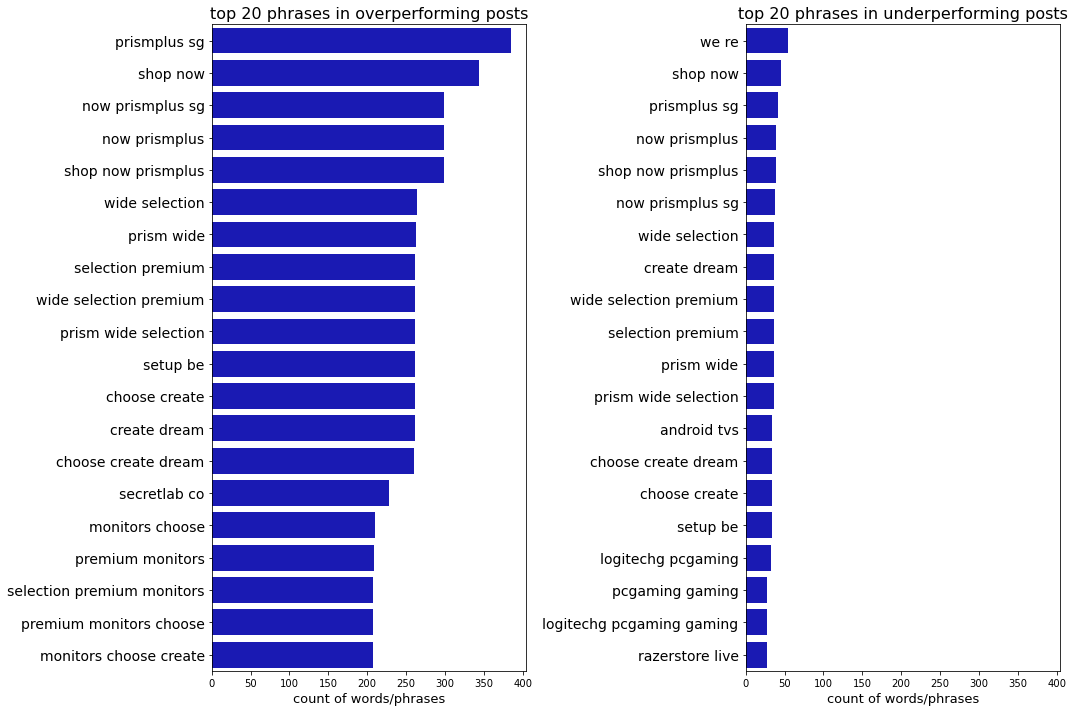

In [16]:
# instantiate a basic vectoriser with only settings for extracting bi- and tri-grams
cvec = CountVectorizer(ngram_range=(2,3))

# r/Singapore - fit/transform count vectoriser to title and get the 20 phrases with the highest count
vec_op = cvec.fit_transform(op['Description'].values.astype(str))
vec_op = pd.DataFrame(vec_op.toarray(), columns = cvec.get_feature_names())
op_20 = vec_op.sum().sort_values(ascending=False).head(20)

# r/Malaysia - fit/transform count vectoriser to title and get the 20 phrases with the highest count
vec_up = cvec.fit_transform(up['Description'].values.astype(str))
vec_up = pd.DataFrame(vec_up.toarray(), columns = cvec.get_feature_names())
up_20 = vec_up.sum().sort_values(ascending=False).head(20)

# plot results
fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10), sharex = True)

sns.barplot(y= op_20.index.values, x = op_20,color='mediumblue',ax=ax[0])
ax[0].set_title('top 20 phrases in overperforming posts',fontsize=16)
ax[0].set_xlabel('count of words/phrases', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

sns.barplot(y=up_20.index.values, x = up_20,color='mediumblue',ax=ax[1])
ax[1].set_title('top 20 phrases in underperforming posts',fontsize=16)
ax[1].set_xlabel('count of words/phrases', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()
plt.savefig("Diagrams/top20_featured_words.jpg", bbox_inches = 'tight')

There are no clear distinctions between phrases in posts that overperform or otherwise. But, this is likely due to the distribution of the dataset as some accounts have far more posts than others. As you can see, prismplus’s brand name appears as the top phrase in both the overperforming and underperforming posts. Further, the low over frequency of each phrase in underperforming posts also reveal a very low count of underperforming posts as compared to overperforming posts. This indicates that we will need some hardcore stratifying when it comes to modelling.

### 2.2 Date and Time <a class="anchor" id="2_2"></a>

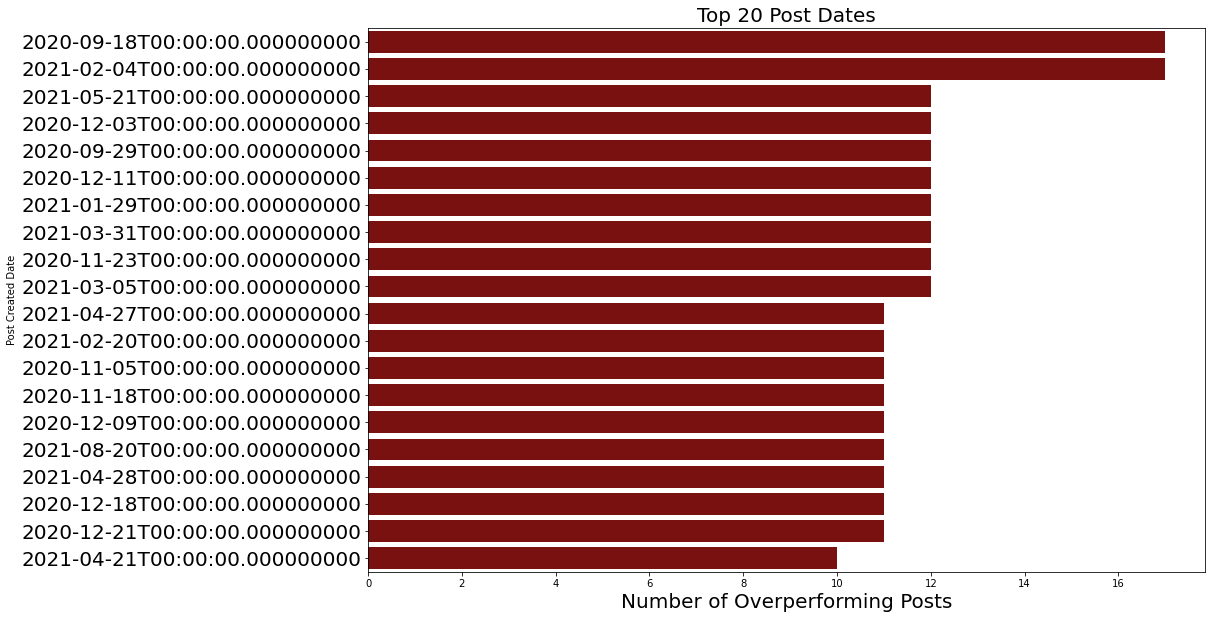

In [17]:
df.groupby('Post Created Date')['Overperforming'].value_counts()
best_dates = df[df.Overperforming != 0]
best_dates_20 = best_dates.groupby(['Post Created Date']).size().reset_index(name='Count').sort_values(by= 'Count', ascending= False).head(20)


fig, ax = plt.subplots(figsize=(15,10));

sns.barplot(y= best_dates_20['Post Created Date'], x = best_dates_20.Count,color='darkred',ax=ax);
ax.set_title('Top 20 Post Dates',fontsize=20);
ax.set_xlabel('Number of Overperforming Posts', fontsize=20);
plt.setp(ax.get_yticklabels(), fontsize=20);
plt.savefig("Diagrams/top20_post_dates", bbox_inches = 'tight')

There seems to be no discernible pattern. I looked into each date in this diagram and they were not dates with any particular significance.

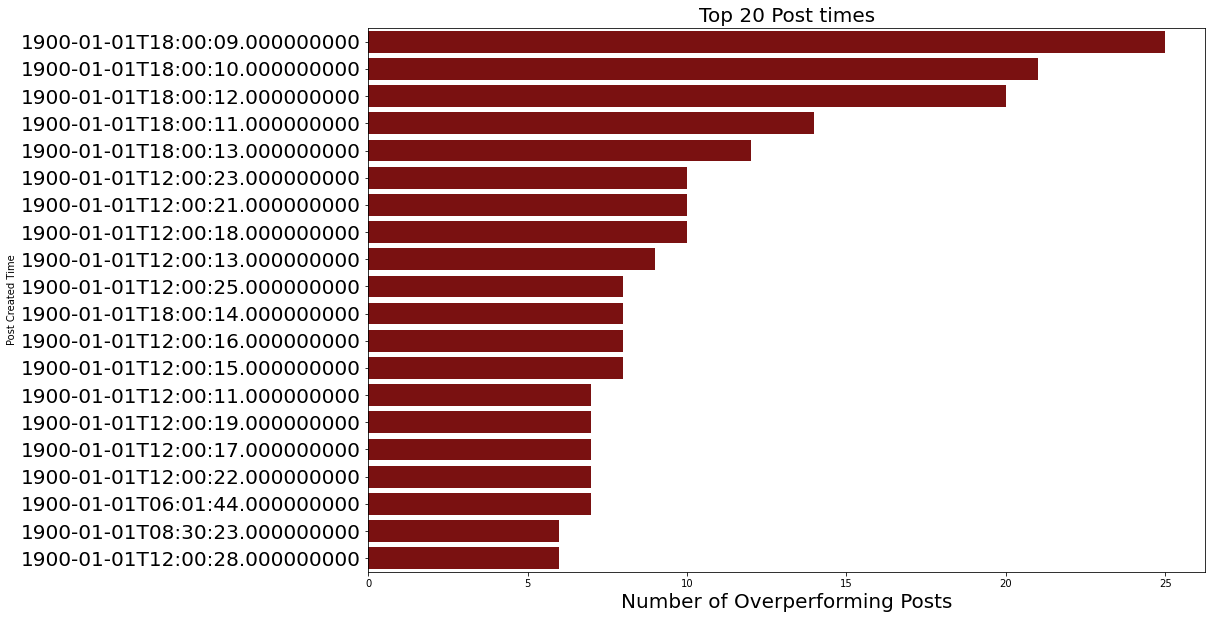

In [18]:
df.groupby('Post Created Time')['Overperforming'].value_counts()
best_times = df[df.Overperforming != 0]
best_times_20 = best_times.groupby(['Post Created Time']).size().reset_index(name='Count').sort_values(by= 'Count', ascending= False).head(20)


fig, ax = plt.subplots(figsize=(15,10));

sns.barplot(y= best_times_20['Post Created Time'], x = best_times_20.Count,color='darkred',ax=ax);
ax.set_title('Top 20 Post times',fontsize=20);
ax.set_xlabel('Number of Overperforming Posts', fontsize=20);
plt.setp(ax.get_yticklabels(), fontsize=20);
plt.savefig("Diagrams/top20_post_times", bbox_inches = 'tight')

We see a pattern emerging – most overperforming posts tend to be posted at 6pm and 12pm.

### 2.3 Accounts Performance  <a class="anchor" id="2_3"></a>

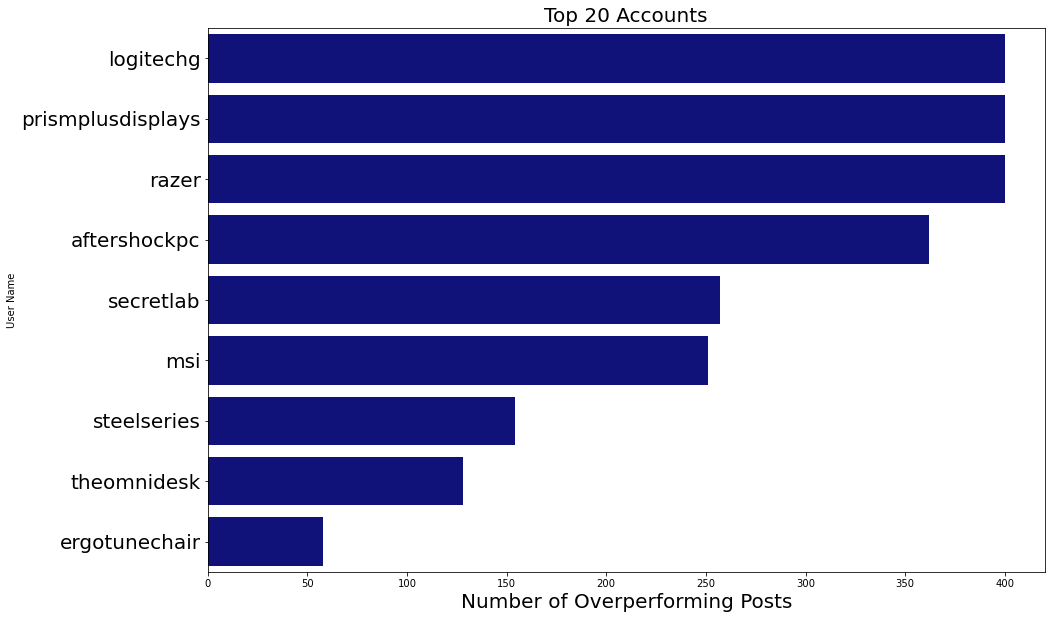

In [19]:
df.groupby('User Name')['Overperforming'].value_counts()
best_accounts = df[df.Overperforming != 0]
best_accounts_20 = best_accounts.groupby(['User Name']).size().reset_index(name='Count').sort_values(by= 'Count', ascending= False).head(20)

fig, ax = plt.subplots(figsize=(15,10));

sns.barplot(y= best_accounts_20['User Name'], x = best_accounts_20.Count,color='darkblue',ax=ax);
ax.set_title('Top 20 Accounts',fontsize=20);
ax.set_xlabel('Number of Overperforming Posts', fontsize=20);
plt.setp(ax.get_yticklabels(), fontsize=20);
plt.savefig("Diagrams/top_accounts", bbox_inches = 'tight')

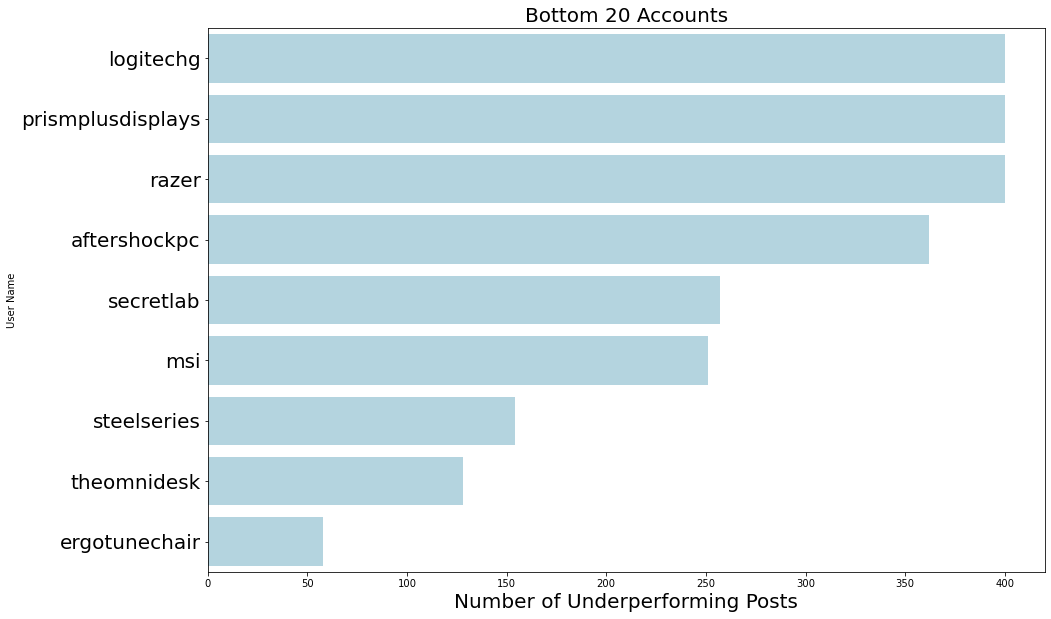

In [20]:
df.groupby('User Name')['Overperforming'].value_counts()
worst_accounts = df[df.Overperforming != 1]
worst_accounts_20 = worst_accounts.groupby(['User Name']).size().reset_index(name='Count').sort_values(by= 'Count', ascending= False).head(20)

fig, ax = plt.subplots(figsize=(15,10));

sns.barplot(y= best_accounts_20['User Name'], x = best_accounts_20.Count,color='lightblue',ax=ax);
ax.set_title('Bottom 20 Accounts',fontsize=20);
ax.set_xlabel('Number of Underperforming Posts', fontsize=20);
plt.setp(ax.get_yticklabels(), fontsize=20);
plt.savefig("Diagrams/bottom_accounts", bbox_inches = 'tight')

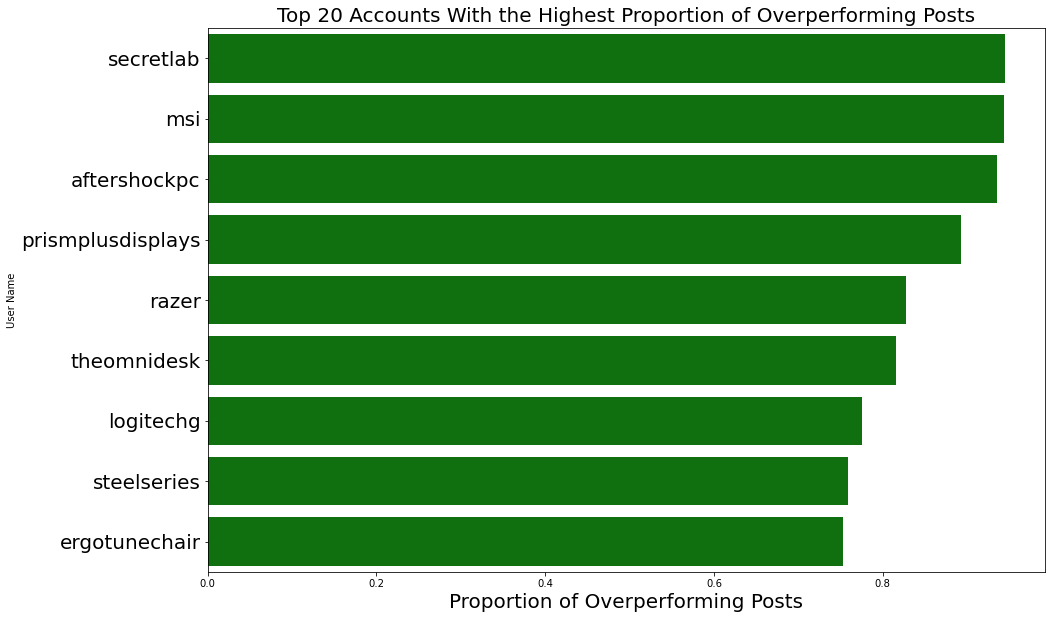

In [21]:
overperforming_prop_20 = df.groupby('User Name')['Overperforming'].mean().reset_index(name='PercentOp').sort_values(by= 'PercentOp',ascending = False).head(20)

fig, ax = plt.subplots(figsize=(15,10));

sns.barplot(y= overperforming_prop_20['User Name'], x = overperforming_prop_20.PercentOp ,color='green',ax=ax);
ax.set_title('Top 20 Accounts With the Highest Proportion of Overperforming Posts',fontsize=20);
ax.set_xlabel('Proportion of Overperforming Posts', fontsize=20);
plt.setp(ax.get_yticklabels(), fontsize=20);
plt.savefig("Diagrams/top_accounts_proportion", bbox_inches = 'tight')

When looking at the proportion or percentage of overperforming post in each account, Ergotune fairs the worst among the 9. This is strange because ergotune’s Instagram advertisements reach the most number of users in the list. This further possibly shows that blindly spending money on Instagram advertisements is not the solution!

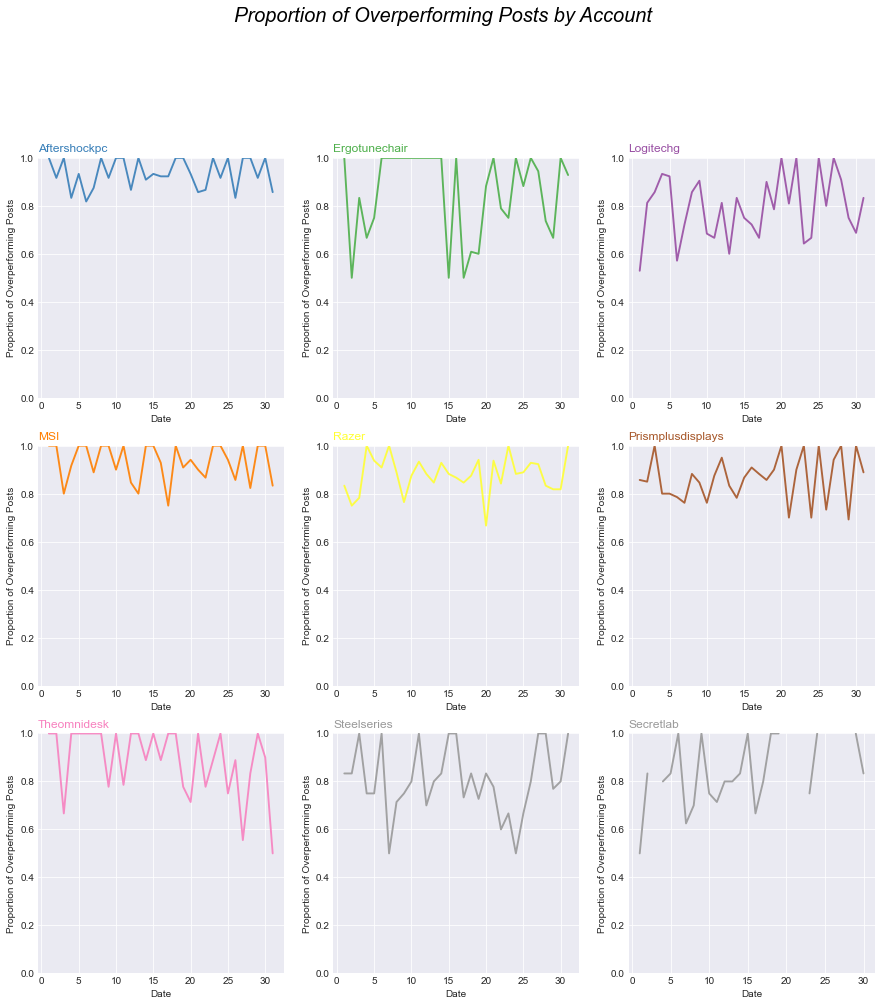

In [22]:
df_day_overperform = df.groupby(['User Name', "day"], as_index=False)["Overperforming"].mean()
df_day_overperform = df_day_overperform.groupby('day')['Overperforming'].apply(lambda df_day_overperform: df_day_overperform.reset_index(drop=True)).unstack().reset_index()
df_day_overperform.rename(columns = {0: 'Aftershockpc', 1: 'Ergotunechair', 2: 'Logitechg', 3: 'MSI', 4: 'Razer', 5: 'Prismplusdisplays', 6: 'Theomnidesk', 7: 'Steelseries', 8: 'Secretlab'}, inplace = True)

# Format Plot
plt.style.use('seaborn-darkgrid');
palette = plt.get_cmap('Set1');

fig = plt.figure(figsize=(15, 15));
# multiple line plot
num=0;
for column in df_day_overperform.drop('day', axis=1):
    num+=1;
 
    # Find the right spot on the plot
    fig.add_subplot(3, 3, num);
#    plt.subplot(3,3, num)

    # Plot the lineplot
    plt.plot(df_day_overperform['day'], df_day_overperform[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column);
  
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off');
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off');
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num));
    plt.xlabel("Date");
    plt.ylabel("Proportion of Overperforming Posts");
    plt.ylim(0,1);
# general title
plt.suptitle("Proportion of Overperforming Posts by Account", fontsize=20, fontweight=0, color='black', style='italic', y=1.02);

# Show the graph
# plt.show();
plt.savefig("Diagrams/performance_across_time", bbox_inches = 'tight')

Viewing the trends of posts in the last month, there seems to be no discernible trends except on 5th to 15th July for ErgoTune and 4th to 6th July for Omnidesk. Upon further investigation, I found that they were doing giveaways on those days of the month which likely accounts for the atypical consistency in performance of their Instagram posts.

## 3.0 Modelling  <a class="anchor" id="3_0"></a>

In [23]:
df.drop(columns = ['Post Created Date', 'Post Created Time'], inplace = True)

In [24]:
# dummify
df = pd.get_dummies(data=df, columns=['User Name', 'Type'])

### 3.1 Description Column Processing<a class="anchor" id="3_1"></a>

In [25]:
op['Description'] = op['Description'].str.replace(r'(link in bio)|(www)|(com)|link|bio',' ').astype('str')
op['Description'] = op['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### 3.2 Feature Engineering <a class="anchor" id="3_2"></a>

In [26]:
features = df.drop(columns = ['Account', 'Likes', 'Comments', 'Views', 'URL', 'Link', 'Photo','Overperforming'])

In [27]:
df.columns = map(str.upper, df.columns)
features.columns = map(str.upper, features.columns)

In [28]:
X = features
y = df.OVERPERFORMING

In [29]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

### 3.3 CV-LogReg Model <a class="anchor" id="3_3"></a>

In [30]:
col_transformer_cvlog = ColumnTransformer(transformers=
                                   [("vec_description", CountVectorizer(), "DESCRIPTION"),
                                    ("ss", StandardScaler(),
                                    [c for c in X_train.columns if c != "DESCRIPTION"])])

# establish pipeline
cv_pipeline = Pipeline(steps=
                [("ct", col_transformer_cvlog), 
                 ('smote', SMOTE(random_state=12)),
                 ("lr", LogisticRegression())])

# establish search params
pipe_params = {
    'ct__vec_description__ngram_range': [(1,2), (2,3), (3,4)],
    'ct__vec_description__max_features':[300, 500, 750],
    'lr__C': [100, 10, 1.0, 0.1, 0.01],
    'lr__intercept_scaling': [1, 1.5, 2],
    'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'lr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'lr__l1_ratio': [0, 0.25, 0.5, 1]
}

cv_lr = RandomizedSearchCV(estimator=cv_pipeline,
                  param_distributions=pipe_params,
                  cv=5,
                    n_jobs = -1)

t0 = time()
cv_lr.fit(X_train, y_train)
cv_lr_test_time = time() - t0
print('Best LR Parameters:', cv_lr.best_estimator_)
print('Fit time:  %0.3fs' % cv_lr_test_time)

Best LR Parameters: Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('vec_description',
                                                  CountVectorizer(max_features=750,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'DESCRIPTION'),
                                                 ('ss', StandardScaler(),
                                                  ['FOLLOWERS AT POSTING',
                                                   'YEAR', 'MONTH', 'DAY',
                                                   'HOUR', 'MINUTE', 'SECOND',
                                                   'USER NAME_AFTERSHOCKPC',
                                                   'USER NAME_ERGOTUNECHAIR',
                                                   'USER NAME_LOGITECHG',
                                        

## 4.0 Hyperparameter Tuning  <a class="anchor" id="4_0"></a>

### 4.1 Finding the Best Vectorizer <a class="anchor" id="4_1"></a>

#### TF-IDF Logistic Regression

In [31]:
col_transformer_tfidflog = ColumnTransformer(transformers=
                                   [("vec_description", TfidfVectorizer(), "DESCRIPTION"),
                                    ("ss", StandardScaler(),
                                    [c for c in X_train.columns if c != "DESCRIPTION"])])

# establish pipeline
tfidf_pipeline = Pipeline(steps=
                [("tfidf", col_transformer_tfidflog), 
                 ('smote', SMOTE(random_state=12)),
                 ("lr", LogisticRegression())])

# establish search params
pipe_params = {
    'tfidf__vec_description__ngram_range': [(1,2), (2,3), (3,4)],
    'tfidf__vec_description__max_features':[300, 500, 750],
    'tfidf__vec_description__max_df': [.2, .3, .4],
    'tfidf__vec_description__ngram_range': [(1,1), (1,2)],
    'lr__C': [100, 10, 1.0, 0.1, 0.01],
    'lr__intercept_scaling': [1, 1.5, 2],
    'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'lr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'lr__l1_ratio': [0, 0.25, 0.5, 1]
}

tfidf_lr = RandomizedSearchCV(estimator=tfidf_pipeline,
                  param_distributions=pipe_params,
                  cv=5,
                    n_jobs = -1)

t0 = time()
tfidf_lr.fit(X_train, y_train)
tfidf_lr_test_time = time() - t0
print('Best LR Parameters:', tfidf_lr.best_estimator_)
print('Fit time:  %0.3fs' % tfidf_lr_test_time)

Best LR Parameters: Pipeline(steps=[('tfidf',
                 ColumnTransformer(transformers=[('vec_description',
                                                  TfidfVectorizer(max_df=0.3,
                                                                  max_features=750,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'DESCRIPTION'),
                                                 ('ss', StandardScaler(),
                                                  ['FOLLOWERS AT POSTING',
                                                   'YEAR', 'MONTH', 'DAY',
                                                   'HOUR', 'MINUTE', 'SECOND',
                                                   'USER NAME_AFTERSHOCKPC',
                                                   'USER NAME_ERGOTUNECHAIR',
                                 

#### Hashing Logistic Regression

In [32]:
col_transformer_hashlog = ColumnTransformer(transformers=
                                   [("vec_description", HashingVectorizer(), "DESCRIPTION"),
                                    ("ss", StandardScaler(),
                                    [c for c in X_train.columns if c != "DESCRIPTION"])])

# establish pipeline
hash_pipeline = Pipeline(steps=
                [("hash", col_transformer_hashlog), 
                 ('smote', SMOTE(random_state=12)),
                 ("lr", LogisticRegression())])

# establish search params
pipe_params = {
    'hash__vec_description__n_features': [1000, 2000, 3000, 4000, 5000],
    'hash__vec_description__ngram_range': [(1,2), (2,3), (3,4)],
    'lr__C': [100, 10, 1.0, 0.1, 0.01],
    'lr__intercept_scaling': [1, 1.5, 2],
    'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'lr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'lr__l1_ratio': [0, 0.25, 0.5, 1]
}

hash_lr = RandomizedSearchCV(estimator=hash_pipeline,
                  param_distributions=pipe_params,
                  cv=5,
                    n_jobs = -1)

t0 = time()
hash_lr.fit(X_train, y_train)
hash_lr_test_time = time() - t0
print('Best LR Parameters:', hash_lr.best_estimator_)
print('Fit time:  %0.3fs' % hash_lr_test_time)

Best LR Parameters: Pipeline(steps=[('hash',
                 ColumnTransformer(transformers=[('vec_description',
                                                  HashingVectorizer(n_features=5000,
                                                                    ngram_range=(1,
                                                                                 2)),
                                                  'DESCRIPTION'),
                                                 ('ss', StandardScaler(),
                                                  ['FOLLOWERS AT POSTING',
                                                   'YEAR', 'MONTH', 'DAY',
                                                   'HOUR', 'MINUTE', 'SECOND',
                                                   'USER NAME_AFTERSHOCKPC',
                                                   'USER NAME_ERGOTUNECHAIR',
                                                   'USER NAME_LOGITECHG',
                                 

In [33]:
#Optimise CountVec-LR and evaluate Model
cv_lr.fit(X_train, y_train)
print(" Optimised CV-LR ".center(42, "="))
print('Accuracy score for Train data set:', round(cv_lr.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(cv_lr.score(X_test, y_test),4))
preds = cv_lr.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
specificity = round(tn / (tn + fp),4)
sensitivity = round(tp / (tp + fn),4)
SSB = 1 - abs(specificity - sensitivity)
print('Specificity:', specificity)
print('Sensitivity:', sensitivity)
print('Specificity-Sensitivity Balance:', SSB)


#Optimise TFIDF-LR and evaluate Model
tfidf_lr.fit(X_train, y_train)
print(" Optimised TFIDF-LR ".center(42, "="))
print('Accuracy score for Train data set:', round(tfidf_lr.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(tfidf_lr.score(X_test, y_test),4))
preds = tfidf_lr.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
specificity = round(tn / (tn + fp),4)
sensitivity = round(tp / (tp + fn),4)
SSB = 1 - abs(specificity - sensitivity)
print('Specificity:', specificity)
print('Sensitivity:', sensitivity)
print('Specificity-Sensitivity Balance:', SSB)


#Optimise Hash-LR and evaluate Model
hash_lr.fit(X_train, y_train)
print(" Optimised Hash-LR ".center(42, "="))
print('Accuracy score for Train data set:', round(hash_lr.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(hash_lr.score(X_test, y_test),4))
preds = hash_lr.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
specificity = round(tn / (tn + fp),4)
sensitivity = round(tp / (tp + fn),4)
SSB = 1 - abs(specificity - sensitivity)
print('Specificity:', specificity)
print('Sensitivity:', sensitivity)
print('Specificity-Sensitivity Balance:', SSB)

============ Optimised CV-LR =============
Accuracy score for Train data set: 0.8447
Accuracy score for Test data set: 0.7397
Specificity: 0.5
Sensitivity: 0.7794
Specificity-Sensitivity Balance: 0.7206
=========== Optimised TFIDF-LR ===========
Accuracy score for Train data set: 0.8594
Accuracy score for Test data set: 0.7824
Specificity: 0.63
Sensitivity: 0.8076
Specificity-Sensitivity Balance: 0.8224
=========== Optimised Hash-LR ============
Accuracy score for Train data set: 0.9525
Accuracy score for Test data set: 0.8165
Specificity: 0.39
Sensitivity: 0.8872
Specificity-Sensitivity Balance: 0.5028


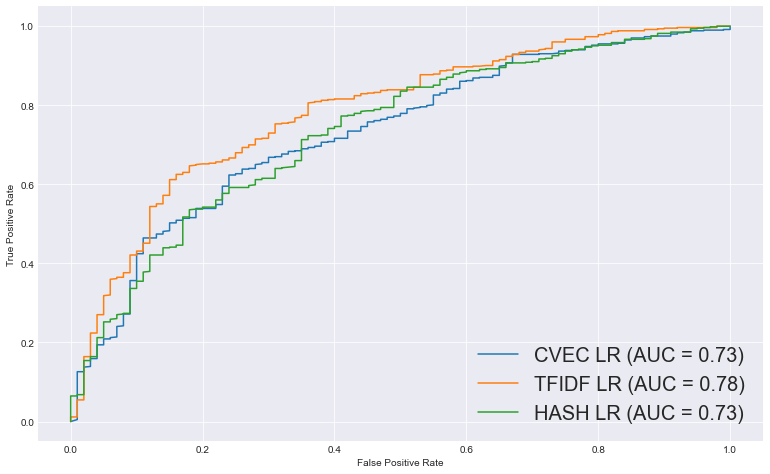

In [34]:
fig, ax = plt.subplots(figsize=(13, 8))
cv_lr_disp = plot_roc_curve(cv_lr, X_test, y_test, name = 'CVEC LR', ax = ax)
tfidf_lr_disp = plot_roc_curve(tfidf_lr, X_test, y_test, name = 'TFIDF LR', ax = ax)
hash_lr_disp = plot_roc_curve(hash_lr, X_test, y_test, name = 'HASH LR', ax = ax)
plt.legend(prop={"size":20});

TFIDF works best

### 4.2 Finding the Best Classifier  <a class="anchor" id="4_2"></a>

#### TFIDF KNearest Neighbours Classifier

In [35]:
col_transformer_tfidflog = ColumnTransformer(transformers=
                                   [("vec_description", TfidfVectorizer(), "DESCRIPTION"),
                                    ("ss", StandardScaler(),
                                    [c for c in X_train.columns if c != "DESCRIPTION"])])

# establish pipeline
tfidf_knn_pipeline = Pipeline(steps=
                [("tfidf", col_transformer_tfidflog), 
                 ('smote', SMOTE(random_state=12)),
                 ("knn", KNeighborsClassifier())])

# establish search params
pipe_params = {
    'tfidf__vec_description__ngram_range': [(1,2), (2,3), (3,4)],
    'tfidf__vec_description__max_features':[300, 500, 750],
    'tfidf__vec_description__max_df': [.2, .3, .4],
    'tfidf__vec_description__ngram_range': [(1,1), (1,2)],
    'knn__n_neighbors': [10,15],
    'knn__p': [1,2]
}

tfidf_knn = RandomizedSearchCV(estimator=tfidf_knn_pipeline,
                  param_distributions=pipe_params,
                  cv=5,
                    n_jobs = -1)

t0 = time()
tfidf_knn.fit(X_train, y_train)
tfidf_knn_test_time = time() - t0
print('Best LR Parameters:', tfidf_knn.best_estimator_)
print('Fit time:  %0.3fs' % tfidf_knn_test_time)

Best LR Parameters: Pipeline(steps=[('tfidf',
                 ColumnTransformer(transformers=[('vec_description',
                                                  TfidfVectorizer(max_df=0.2,
                                                                  max_features=500),
                                                  'DESCRIPTION'),
                                                 ('ss', StandardScaler(),
                                                  ['FOLLOWERS AT POSTING',
                                                   'YEAR', 'MONTH', 'DAY',
                                                   'HOUR', 'MINUTE', 'SECOND',
                                                   'USER NAME_AFTERSHOCKPC',
                                                   'USER NAME_ERGOTUNECHAIR',
                                                   'USER NAME_LOGITECHG',
                                                   'USER NAME_MSI',
                                                   'USER

#### TFIDF Decision Tree Classifier

In [36]:
col_transformer_tfidfdt = ColumnTransformer(transformers=
                                   [("vec_description", TfidfVectorizer(), "DESCRIPTION"),
                                    ("ss", StandardScaler(),
                                    [c for c in X_train.columns if c != "DESCRIPTION"])])

# establish pipeline
tfidf_dt_pipeline = Pipeline(steps=
                [("tfidf", col_transformer_tfidflog), 
                 ('smote', SMOTE(random_state=12)),
                 ("dt", DecisionTreeClassifier())])

# establish search params
pipe_params = {
    'tfidf__vec_description__ngram_range': [(1,2), (2,3), (3,4)],
    'tfidf__vec_description__max_features':[300, 500, 750],
    'tfidf__vec_description__max_df': [.2, .3, .4],
    'tfidf__vec_description__ngram_range': [(1,1), (1,2)],
    'dt__min_samples_split': [100 ,200, 300],
    'dt__ccp_alpha': [0, 0.001]
}

tfidf_dt = RandomizedSearchCV(estimator=tfidf_dt_pipeline,
                  param_distributions=pipe_params,
                  cv=5,
                    n_jobs = -1)

t0 = time()
tfidf_dt.fit(X_train, y_train)
tfidf_dt_test_time = time() - t0
print('Best LR Parameters:', tfidf_dt.best_estimator_)
print('Fit time:  %0.3fs' % tfidf_dt_test_time)

Best LR Parameters: Pipeline(steps=[('tfidf',
                 ColumnTransformer(transformers=[('vec_description',
                                                  TfidfVectorizer(max_df=0.4,
                                                                  max_features=500),
                                                  'DESCRIPTION'),
                                                 ('ss', StandardScaler(),
                                                  ['FOLLOWERS AT POSTING',
                                                   'YEAR', 'MONTH', 'DAY',
                                                   'HOUR', 'MINUTE', 'SECOND',
                                                   'USER NAME_AFTERSHOCKPC',
                                                   'USER NAME_ERGOTUNECHAIR',
                                                   'USER NAME_LOGITECHG',
                                                   'USER NAME_MSI',
                                                   'USER

In [37]:
#Optimise TFIDF-LR and evaluate Model
tfidf_lr.fit(X_train, y_train)
print(" Optimised TFIDF-LR ".center(42, "="))
print('Accuracy score for Train data set:', round(tfidf_lr.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(tfidf_lr.score(X_test, y_test),4))
preds = tfidf_lr.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
specificity = round(tn / (tn + fp),4)
sensitivity = round(tp / (tp + fn),4)
SSB = 1 - abs(specificity - sensitivity)
print('Specificity:', specificity)
print('Sensitivity:', sensitivity)
print('Specificity-Sensitivity Balance:', SSB)



#Optimise TFIDF-KNearest Neighbours Classifier and evaluate Model
tfidf_knn.fit(X_train, y_train)
print(" Optimised TFIDF-KNN ".center(42, "="))
print('Accuracy score for Train data set:', round(tfidf_knn.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(tfidf_knn.score(X_test, y_test),4))
preds = tfidf_knn.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
specificity = round(tn / (tn + fp),4)
sensitivity = round(tp / (tp + fn),4)
SSB = 1 - abs(specificity - sensitivity)
print('Specificity:', specificity)
print('Sensitivity:', sensitivity)
print('Specificity-Sensitivity Balance:', SSB)


#Optimise Hash-LR and evaluate Model
tfidf_dt.fit(X_train, y_train)
print(" Optimised TFIDF-DT ".center(42, "="))
print('Accuracy score for Train data set:', round(tfidf_dt.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(tfidf_dt.score(X_test, y_test),4))
preds = tfidf_dt.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
specificity = round(tn / (tn + fp),4)
sensitivity = round(tp / (tp + fn),4)
SSB = 1 - abs(specificity - sensitivity)
print('Specificity:', specificity)
print('Sensitivity:', sensitivity)
print('Specificity-Sensitivity Balance:', SSB)

=========== Optimised TFIDF-LR ===========
Accuracy score for Train data set: 0.8775
Accuracy score for Test data set: 0.7681
Specificity: 0.56
Sensitivity: 0.8027
Specificity-Sensitivity Balance: 0.7573000000000001
========== Optimised TFIDF-KNN ===========
Accuracy score for Train data set: 0.7688
Accuracy score for Test data set: 0.7013
Specificity: 0.71
Sensitivity: 0.6998
Specificity-Sensitivity Balance: 0.9898
=========== Optimised TFIDF-DT ===========
Accuracy score for Train data set: 0.859
Accuracy score for Test data set: 0.7852
Specificity: 0.46
Sensitivity: 0.8391
Specificity-Sensitivity Balance: 0.6209


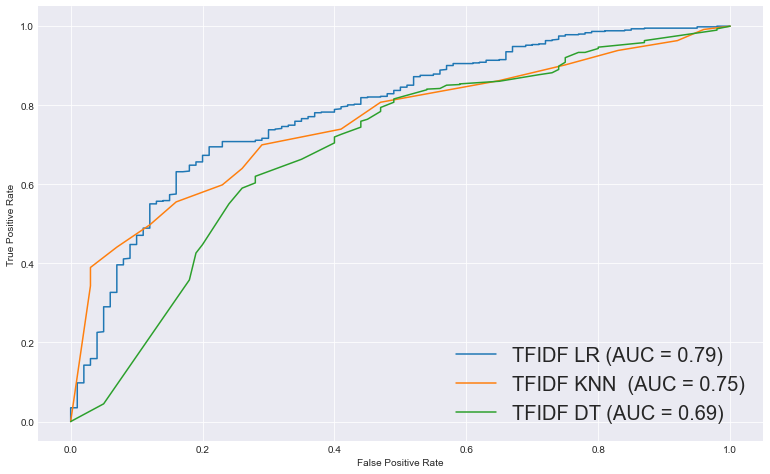

In [38]:
fig, ax = plt.subplots(figsize=(13, 8))
tfidf_lr_disp = plot_roc_curve(tfidf_lr, X_test, y_test, name = 'TFIDF LR', ax = ax)
tfidf_knn_disp = plot_roc_curve(tfidf_knn, X_test, y_test, name = 'TFIDF KNN ', ax = ax)
tfidf_dt_disp = plot_roc_curve(tfidf_dt, X_test, y_test, name = 'TFIDF DT', ax = ax)
plt.legend(prop={"size":20});

When tuning the models, I found that TFIDF-KNN performed the best, however, I chose to go ahead with TFIDF-Logreg because feature importance through model interpretation is much more manageable in the latter.

## 5.0 Findings and Insights <a class="anchor" id="5_0"></a>

In [39]:
tfidf_lr_best = tfidf_lr.best_estimator_

In [40]:
tfidf_lr_best.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 ColumnTransformer(transformers=[('vec_description',
                                                  TfidfVectorizer(max_df=0.3,
                                                                  max_features=750),
                                                  'DESCRIPTION'),
                                                 ('ss', StandardScaler(),
                                                  ['FOLLOWERS AT POSTING',
                                                   'YEAR', 'MONTH', 'DAY',
                                                   'HOUR', 'MINUTE', 'SECOND',
                                                   'USER NAME_AFTERSHOCKPC',
                                                   'USER NAME_ERGOTUNECHAIR',
                                                   'USER NAME_LOGITECHG',
                                                   'USER NAME_MSI',
                                                   'USER '
                 

In [41]:
tfidf_lr_best_named_steps = tfidf_lr_best.named_steps["lr"]
tfidf_lr_best_named_steps_vec = tfidf_lr_best.named_steps["tfidf"]

In [42]:
tfidf_lr_coefs = pd.DataFrame(tfidf_lr_best_named_steps.coef_)
tfidf_lr_coefs = tfidf_lr_coefs.head().T
tfidf_lr_coefs.rename(columns={0:"coef"}, inplace=True)

tfidf_lr_coefs.head()

,coef
0,-0.454790
1,0.730237
2,-0.003710
3,0.195747
4,-1.873514


In [43]:
description_words = [w for w in tfidf_lr_best_named_steps_vec.named_transformers_["vec_description"].get_feature_names()]
tfidf_lr_best_features = (description_words + [c for c in X_train.columns if c != "DESCRIPTION"])
tfidf_lr_coefs["features"] = tfidf_lr_best_features
tfidf_lr_coefs.set_index('features', inplace=True)
tfidf_lr_coefs.head()

,coef
features,
000,-0.454790
10,0.730237
100,-0.003710
10th,0.195747
11,-1.873514


In [44]:
plot_df = tfidf_lr_coefs[tfidf_lr_coefs['coef'] != 0]
plot_df['magnitude'] = abs(plot_df['coef'])
plot_df = plot_df.sort_values('magnitude', ascending=False).reset_index()
plot_df_top50 = plot_df[:50].sort_values('coef', ascending=True).rename(mapper={'index': "features"}).rename(columns={'index': "features"}) 
plot_df_top50.columns

Index(['features', 'coef', 'magnitude'], dtype='object')

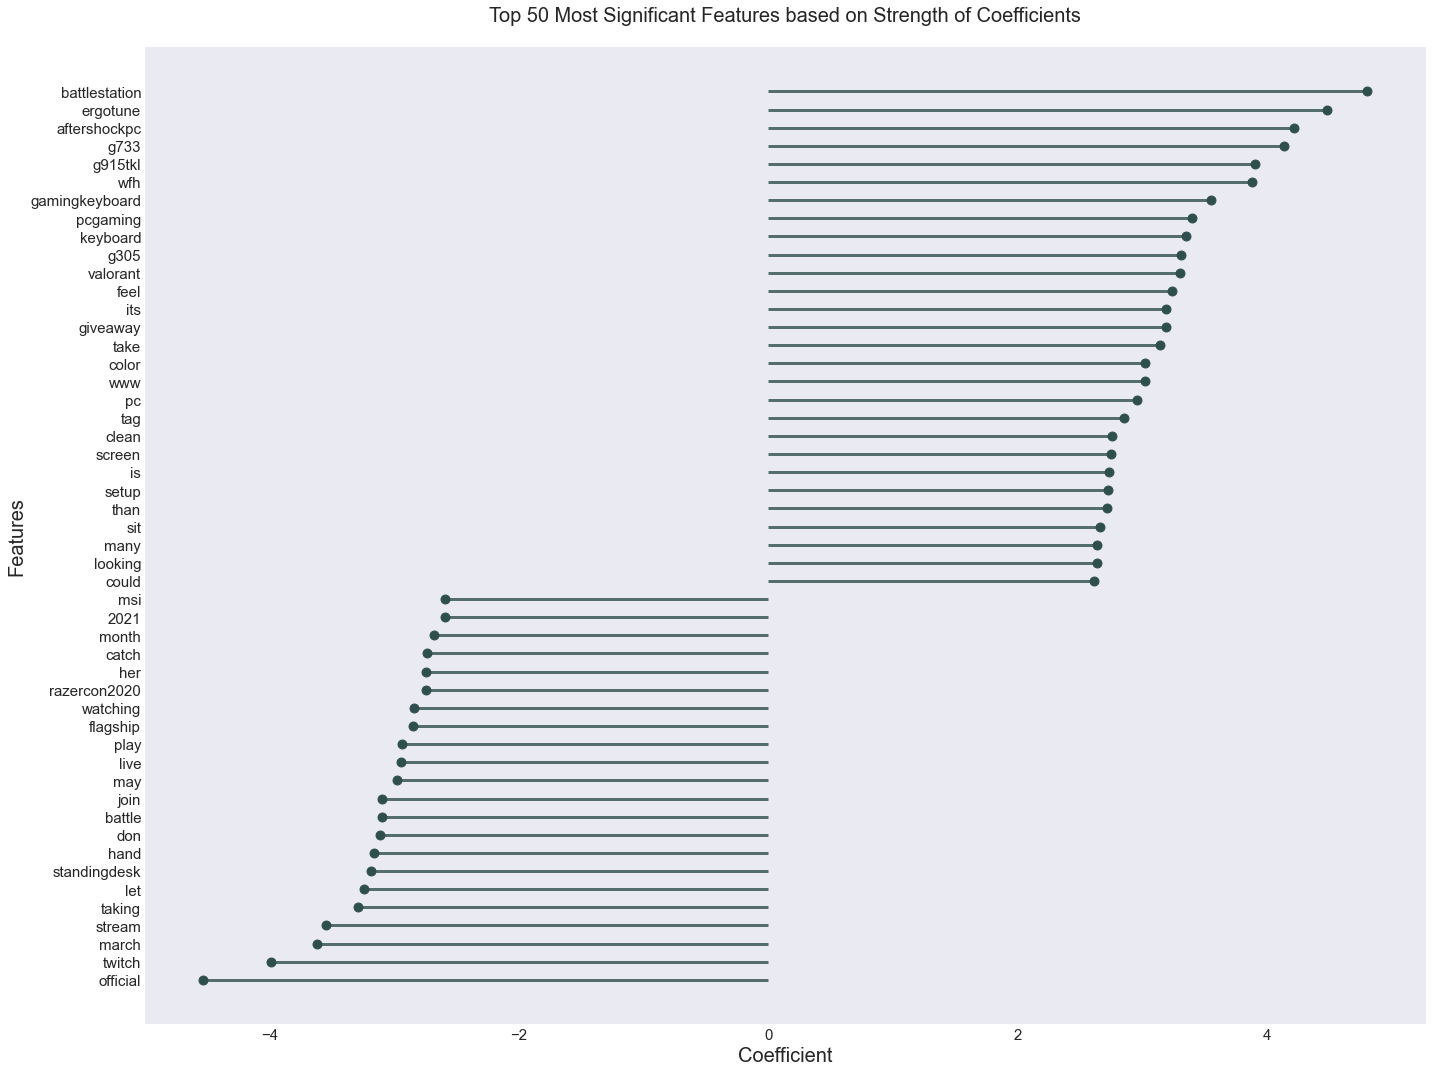

In [45]:
fig = plt.figure(figsize=(20,15), tight_layout = True)
my_range=range(0,len(plot_df_top50))

plt.hlines(y=plot_df_top50['features'], xmin=0,color='darkslategrey',xmax=plot_df_top50['coef'],linewidth=3, alpha =0.8)
plt.scatter(plot_df_top50['coef'], my_range,color='darkslategrey',s=80, alpha=1)
plt.title("Top 50 Most Significant Features based on Strength of Coefficients", fontsize=20, x=0.5,y=1.02)
plt.xlabel('Coefficient', fontsize=20)
plt.ylabel('Features',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid()
plt.savefig("Diagrams/features.jpg", bbox_inches='tight')

First, let’s talk accounts. Previously in the EDA phase, we saw that ergotune was at the bottom of the performance list in terms of percentage of overperforming posts. Now, however, we find that the word ergotune is a significant feature in predicting overperforming posts. Conversely, quoting MSI and standing desk, the latter being associated the Omnidesk, pushes our model to predict an underperforming post.

On to buzzwords, we see work from home and giveaway. These two definitely stand out as the more expected buzz words among the others given that most products sold by our 9 companies function as work from home tools and also because everyone is a sucker for giveaways.

The last thing to note is that the model also processed each post’s date and time stamp, yet neither appeared as important feature, this implies that it is possible that the marketing industry’s fixation on an optimal post date and time could really just be bro science or tradition with no true efficacy.

In [47]:
# Conclusion covering limitations and recommendations are joined with that of image data in the README.md